# Kibble example
Models my artificer attempting crafting checks Kibble's Crafting System: (https://www.reddit.com/r/UnearthedArcana/comments/rg5y3q/kibbles_crafting_system_a_comprehensive_system_of/).

Uses pandas to put data into dataframes and plotly for viz

In [1]:
# imports
from kibble import Kibble, roll_until_complete
from dice import Dice, Advantage
import pandas as pd
import numpy as np
import plotly.express as px

Let's try and craft some rings:  
 - Ring of Jumping: 4 x DC 12 Checks  
 - Ring of Resistance: 8 x DC 16 Checks  
 - Ring of Telekinesis: 8 x DC 19 Checks  
 - Ring of Invisibility: 16 x DC 22 Checks

We'll try craft 100 of each and see how many we succeed.

In [2]:
rings = [
    (12,4,"Jumping"), 
    (16,8,"Resistance"), 
    (19,8,"Telekinesis"), 
    (22,16,"Invisibility")
]
n_sims = 1000
print(*rings[1])

16 8 Resistance


 Our dice is a d20 with an +8 modifier.

In [3]:
artificer = Dice(20,8)

Now create df with results

In [14]:
results = pd.DataFrame(
    {
        "Item":[],
        "Success":[],
        "Rolls":[]
    }
)
for ring in rings:
    for _ in range(n_sims):
        sim_kibble = Kibble( *ring )
        roll_until_complete(sim_kibble, artificer.roll)
        results.loc[len(results)] = {
                "Item":sim_kibble.name,
                 "Success":sim_kibble.is_success(),
                 "Rolls":sim_kibble.n_rolls
            }

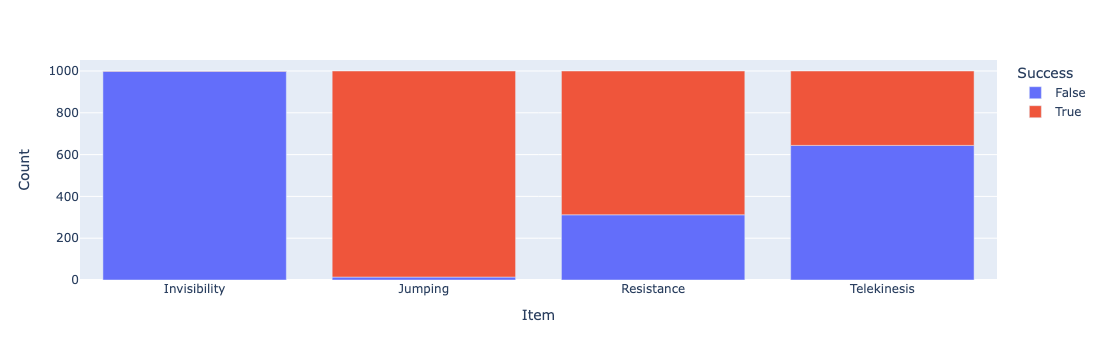

In [18]:
success_df = results.filter(items=['Item', 'Success']).groupby(by = "Item").value_counts().reset_index(name='Count')
fig = px.bar(success_df, x="Item", y="Count", color="Success")
fig.show()